# Problem Statement

#### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. Although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

#### We have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

### Goals of the Case Study: 
#### Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

### Solution Steps:
1. Importing & Inspecting the Dataset
2. Data Preparation
3. Test-Train Split
4. Feature Scaling 
5. Looking for Correlations
6. Model Building
7. Feature Selection using RFE
8. Plotting the ROC Curve
9. Finding the Optimal Cutoff Point
10. Making Predictions on the Test Set

### Step 1: Importing & Inspecting the Data set. 

In [1]:
# Importing libraries
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import xticks
%matplotlib inline

pd.set_option('display.max_columns',None)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data
lead_data = pd.read_csv("Leads.csv")

In [3]:
# Inspecting the dataframe
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking the dimension
lead_data.shape

(9240, 37)

In [5]:
# checking the column info
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# statistical data of numerical columns
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Check unique values in the non-numeric columns
lead_data['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [8]:
lead_data['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [9]:
lead_data['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [10]:
lead_data['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [11]:
lead_data['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [12]:
lead_data['How did you hear about X Education'].unique()

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

In [13]:
lead_data['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [14]:
lead_data['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [15]:
lead_data['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [16]:
lead_data['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [17]:
lead_data['Lead Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [18]:
lead_data['City'].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [19]:
lead_data['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

## Step 2: Data Preparation

In [20]:
# As we can observe that there are 'Select' values for many column.
# This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Let's convert 'Select' values to NaN
lead_data = lead_data.replace('Select', np.nan)

In [21]:
# Next we'll check for duplicates
sum(lead_data.duplicated(subset = 'Prospect ID')) == 0

True

In [22]:
sum(lead_data.duplicated(subset = 'Lead Number')) == 0

True

In [23]:
# The dataset contains both the system generated columns from the form filled by the leads and the ones filled after by the Sales Team.
# The Sales Team generated columns include - 'Tags', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Profile Score', 'Last Activity', 'Last Notable Activity'
# As the model needs to predict the conversion for the Sales team to act on it, we can drop all the Sales Team generated columns.

lead_data = lead_data.drop(['Tags', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Profile Score', 'Last Activity', 'Last Notable Activity'], 1)



In [24]:
# Checking for missing values
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [25]:
# we will drop the columns having more than 40% NA values.
lead_data = lead_data.drop(lead_data.loc[:,list(round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)>70)].columns, 1)

In [26]:
# Reviewing each column in the descending order of missing percentage
# Then imputing the missing values

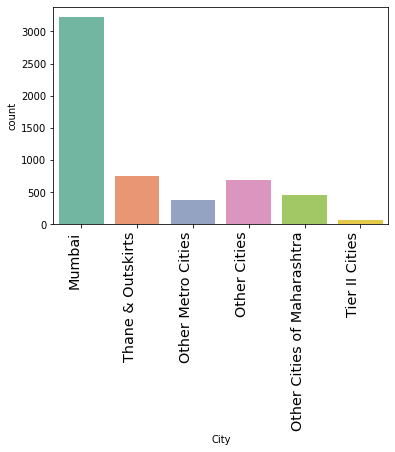

In [27]:
# City - 39.71% missing
j =sns.countplot(x="City", data=lead_data, palette="Set2")
j.set_xticklabels(
    j.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.show()

In [28]:
lead_data.City.value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [29]:
# With 39.71% missing data, it's almost at the cutoff threshold of 40% we decided for dropping
# And after looking at the variance and the charts, we see the responses are heavily skewed to Mumbai.
# We'll drop this column as it doesn't seem that it'll be of any importance to the final model. 
lead_data = lead_data.drop('City', 1)

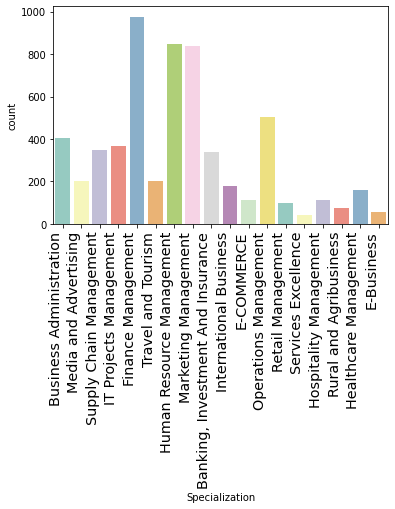

In [30]:
# Specialization - 36.58% missing
p =sns.countplot(x="Specialization", data=lead_data, palette="Set3")
p.set_xticklabels(
    p.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.show()

In [31]:
# It's likely that people who left the Specialization field blank are from some other specialization
# Hence, we'll impute all the missing values as 'Others'

lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

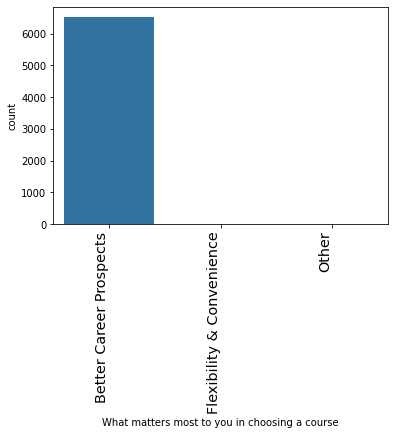

In [32]:
# What matters most to you in choosing a course - 29.32% missing
k =sns.countplot(x="What matters most to you in choosing a course", data=lead_data)
k.set_xticklabels(
    k.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.show()

In [33]:
lead_data["What matters most to you in choosing a course"].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [34]:
# We'll drop this column as there's no variance in the data with 99.9% responses say 'Better Career Prospects'
lead_data = lead_data.drop("What matters most to you in choosing a course", 1)

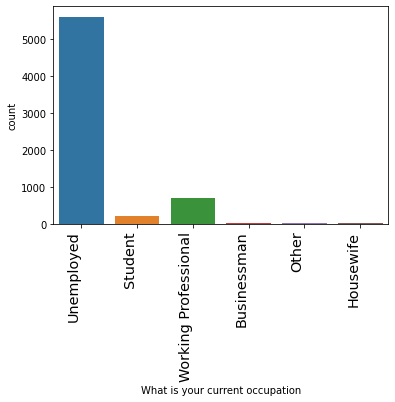

In [35]:
# What is your current occupation - 29.11% missing
y =sns.countplot(x="What is your current occupation", data=lead_data)
y.set_xticklabels(
    y.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.show()

In [36]:
lead_data["What is your current occupation"].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [37]:
# we'll impute the missing values with 'Unemployed' as that's the most commonly chosen option
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'Unemployed')

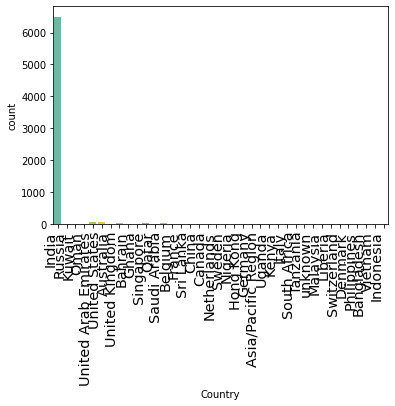

In [38]:
# Country - 26.63% missing
j =sns.countplot(x="Country", data=lead_data, palette="Set2")
j.set_xticklabels(
    j.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.show()

In [39]:
lead_data["Country"].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
France                   0.088509
Oman                     0.088509
unknown                  0.073757
Germany                  0.059006
Canada                   0.059006
South Africa             0.059006
Kuwait                   0.059006
Nigeria                  0.059006
Sweden                   0.044254
Uganda                   0.029503
Ghana                    0.029503
Netherlands              0.029503
Italy                    0.029503
Philippines              0.029503
Bangladesh               0.029503
China                    0.029503
Belgium                  0.029503
Asia/Pacific Region      0.029503
Liberia                  0.014751
Switzerland   

In [40]:
# We'll drop this column as there's no variance in the data with 95% responses are for India alone.
lead_data = lead_data.drop('Country', 1)

In [41]:
# 'TotalVisits', 'Page Views Per Visit' - 1.48% missing
lead_data[['TotalVisits', 'Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [42]:
# We'll impute the missing values with their respective mean
lead_data.TotalVisits = lead_data.TotalVisits.replace(np.nan,lead_data.TotalVisits.mean())

In [43]:
lead_data['Page Views Per Visit'] = lead_data['Page Views Per Visit'].replace(np.nan,lead_data['Page Views Per Visit'].mean())

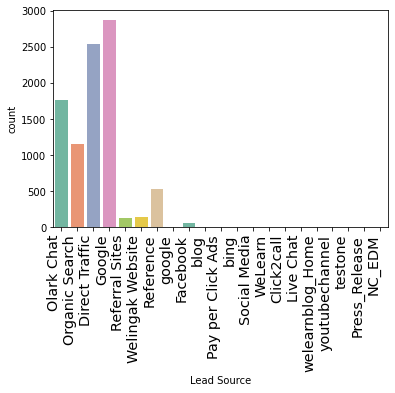

In [44]:
# Lead Source - 0.39% missing
j =sns.countplot(x="Lead Source", data=lead_data, palette="Set2")
j.set_xticklabels(
    j.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.show()

In [45]:
lead_data["Lead Source"].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Social Media          0.021730
Press_Release         0.021730
Live Chat             0.021730
testone               0.010865
WeLearn               0.010865
welearnblog_Home      0.010865
NC_EDM                0.010865
Pay per Click Ads     0.010865
youtubechannel        0.010865
blog                  0.010865
Name: Lead Source, dtype: float64

In [46]:
# Given such a small percentage of missing, we can safely replace it with the 'Other'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.nan, 'Other')

In [47]:
# As many of the sources have less than 0.5% representation, we'll replace all of them into a single source 'Others'
other_sources = ['Other','bing', 'google','Click2call','Social Media','Live Chat','Press_Release','youtubechannel','blog','welearnblog_Home','WeLearn','testone','NC_EDM','Pay per Click Ads']
lead_data['Lead Source'] = lead_data['Lead Source'].replace(other_sources, 'Others')

In [48]:
lead_data["Lead Source"].value_counts(normalize=True)*100

Google              31.038961
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Others               0.692641
Facebook             0.595238
Name: Lead Source, dtype: float64

In [49]:
# Checking the percentage of missing values
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [50]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Specialization                      

**Here's a final list of columns that we'll proceed with. All the rows (9240) are retained**

In [51]:
# Checking for outliers in the continuous variables 
lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99, .9999])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.445238,487.698268,2.362820
std,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


**^^Only TotalVisits and Page Views Per Visit have much higher outliers**

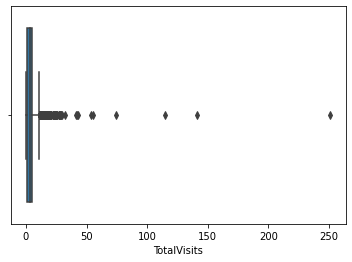

In [52]:
sns.boxplot(lead_data['TotalVisits'])

In [53]:
# We'll limit the outliers for TotalVisits by updating the values > 35 to 35. 
lead_data.loc[lead_data.TotalVisits > 35, 'TotalVisits'] = 35

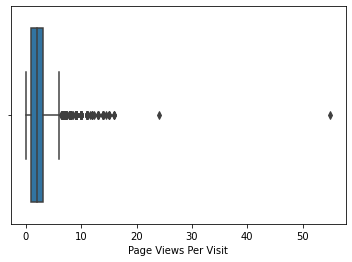

In [54]:
sns.boxplot(lead_data['Page Views Per Visit'])

In [55]:
# We'll limit the outliers for Page Views Per Visit by updating the values > 15 to 15. 
lead_data.loc[lead_data.TotalVisits > 15, 'Page Views Per Visit'] = 15

### Univariate Analysis

In [56]:
#Conversion Rate based on the provided dataset
hist_conv_rate = lead_data.Converted.sum()/len(lead_data.index)*100
hist_conv_rate

38.53896103896104

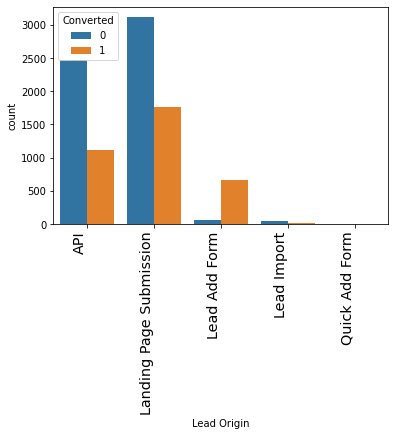

In [57]:
# Conversion by Lead Origin 
jk =sns.countplot(x="Lead Origin", hue = "Converted", data=lead_data)
jk.set_xticklabels(
    jk.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontsize='x-large')
plt.show()

**^^The API and Landing Page Submission are two highest sources of the 'Lead Origin', however the conversion is much higher for Lead Add Form.**

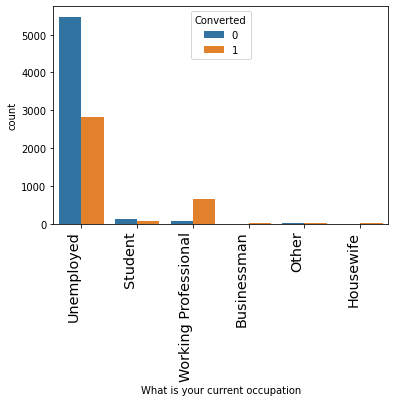

In [58]:
# Conversion by Current Occupation
mn =sns.countplot(x="What is your current occupation", hue = "Converted", data=lead_data)
mn.set_xticklabels(
    mn.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontsize='x-large')
plt.show()

**^^Most of the leads are Unemployed and the Conversion is also high for it, however it's the Working Professionals who have a better conversion rate.**

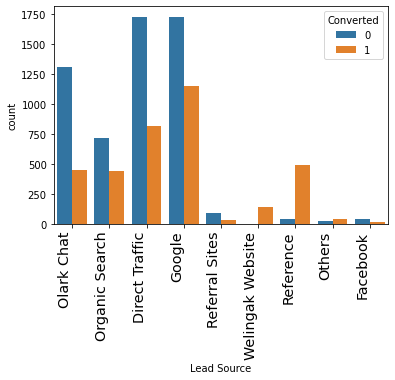

In [59]:
# Conversion by Lead Source
kk =sns.countplot(x="Lead Source", hue = "Converted", data=lead_data)
kk.set_xticklabels(
    kk.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontsize='x-large')
plt.show()

**^^The best conversion rate can be seen for leads that come through Reference and then the Welingak Website.**

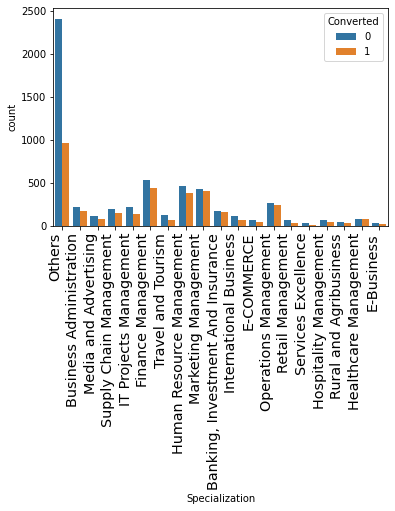

In [60]:
# Conversion by Specialization
kk =sns.countplot(x="Specialization", hue = "Converted", data=lead_data)
kk.set_xticklabels(
    kk.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontsize='x-large')
plt.show()

**^^Most of the leads haven't selected a specialization hence we see a very high number for 'Others. 
Marketing Management and Operations Management leads have a better conversion rate**

In [61]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No


### Converting the Binary Variables (Yes/No) to 0/1

In [62]:
varlist = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes':1,'No':0})

In [63]:
# Applying the function
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [64]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Others,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Others,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,0,0,0,0,0,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Others,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0


### Creating dummy features for categorical variables with multiple levels, 

In [65]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source',
       'Specialization', 'What is your current occupation']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [66]:
# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy], axis=1)


In [67]:
# Dropping the repeated (original) columns
lead_data = lead_data.drop(['Lead Origin', 'Lead Source',
       'Specialization', 'What is your current occupation'], 1)

In [68]:
lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


## Step 3: Test-Train Split

In [69]:
#import the needed library
from sklearn.model_selection import train_test_split

In [70]:
# Putting all feature variables to X
X = lead_data.drop(['Prospect ID','Converted','Lead Number'], axis = 1)

In [71]:
# Putting response variable to y
y = lead_data.Converted

In [72]:
# Splitting the data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, test_size = 0.3, random_state=100)

## Step 4: Feature Scaling

In [73]:
# Import the needed library
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,0,0,0.114286,0.214349,0.088667,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3516,0,0,0.142857,0.046655,0.166667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,0,0,0.142857,0.541373,0.333333,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


## Step 5: Model Building

In [75]:
import statsmodels.api as sm

In [76]:
#Logistic Regression Model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6420
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2934.4
Date:                Mon, 17 May 2021   Deviance:                       5868.8
Time:                        22:50:53   Pearson chi2:                 8.66e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6563      1.017     -1.628      0.103      -3.650       0.337
Do Not Email                                            -1.3451      0.161     -8.371      0.000      -1.660      -1.030
Do Not Call                                             21.1610   5.54e+04      0.000      1.000   -1.09e+05    1.09e+05
TotalVisits                                              2.6523      0.539      4.921      0.000       1.596       3.709
Total Time Spent on Website                              4.5090      0.158     28.556      0.000       4.200       4.819
Page Views Per Visit                                    -1.1842      0.351     -3.371      0.001      -1.873      -0.496
Search                                                  -0.0709      0.804     -0.088      0.930      -1.647       1.505
Magazine                                              -5.95e-09    1.9e-05     -0.000      1.000   -3.72e-05    3.72e-05
Newspaper Article                                       24.6642   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
X Education Forums                                     -27.6627   1.25e+05     -0.000      1.000   -2.46e+05    2.46e+05
Newspaper                                              -25.7179   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                                  -21.3564   5.56e+04     -0.000      1.000   -1.09e+05    1.09e+05
Through Recommendations                                  1.0435      1.462      0.714      0.475      -1.821       3.908
Receive More Updates About Our Courses               -7.734e-10   5.05e-06     -0.000      1.000    -9.9e-06     9.9e-06
Update me on Supply Chain Content                    -1.287e-09   5.06e-06     -0.000      1.000   -9.93e-06    9.92e-06
Get updates on DM Content                             4.923e-09   1.17e-05      0.000      1.000   -2.28e-05    2.28e-05
I agree to pay the amount through cheque             -6.664e-10   1.22e-05  -5.45e-05      1.000    -2.4e-05     2.4e-05
A free copy of Mastering The Interview                  -0.2566      0.102     -2.525      0.012      -0.456      -0.057
Lead Origin_Landing Page Submission                     -0.7742      0.130     -5.965      0.000      -1.029      -0.520
Lead Origin_Lead Add Form                                3.3847      0.737      4.595      0.000       1.941       4.828
Lead Origin_Lead Import                                 -0.1747      2.531     -0.069      0.945      -5.135       4.786
Lead Origin_Quick Add Form                              21.0874   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Facebook                                    -0

## Step 6: Feature Selection using RFE & Manual Method

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)                      #Running RFE with 15 variables as the output
rfe = rfe.fit(X_train, y_train)

In [78]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 19),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 30),
 ('Magazine', False, 35),
 ('Newspaper Article', False, 7),
 ('X Education Forums', False, 8),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 20),
 ('Receive More Updates About Our Courses', False, 34),
 ('Update me on Supply Chain Content', False, 36),
 ('Get updates on DM Content', False, 37),
 ('I agree to pay the amount through cheque', False, 38),
 ('A free copy of Mastering The Interview', False, 11),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 10),
 ('Lead Origin_Quick Add Form', False, 29),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Oth

In [79]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Newspaper', 'Digital Advertisement',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [80]:
#Check for the VIF values of the features variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,6.87
1,TotalVisits,6.07
6,Lead Origin_Landing Page Submission,2.69
11,Specialization_Others,2.18
2,Total Time Spent on Website,2.01
8,Lead Source_Olark Chat,1.80
7,Lead Origin_Lead Add Form,1.39
9,Lead Source_Welingak Website,1.26
14,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.10


In [81]:
# Based on VIF, we'll drop 'Page Views Per Visit'
col1 = col.drop('Page Views Per Visit', 1)

In [82]:
# Checking the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Landing Page Submission,2.45
1,TotalVisits,2.27
10,Specialization_Others,2.14
2,Total Time Spent on Website,2.00
7,Lead Source_Olark Chat,1.79
6,Lead Origin_Lead Add Form,1.39
8,Lead Source_Welingak Website,1.26
13,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.10
9,Specialization_Hospitality Management,1.02


In [83]:
# Now the VIF for all variables is under 5 so we'll continue with assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2961.0
Date:                Mon, 17 May 2021   Deviance:                       5922.0
Time:                        22:50:57   Pearson chi2:                 8.89e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2378      0.134     -9.245      0.000      -1.500      -0.975
Do Not Email                                            -1.3519      0.158     -8.572      0.000      -1.661      -1.043
TotalVisits                                              1.2692      0.349      3.635      0.000       0.585       1.954
Total Time Spent on Website                              4.4767      0.156     28.703      0.000       4.171       4.782
Newspaper                                              -24.3457   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement                                  -21.6110   2.48e+04     -0.001      0.999   -4.86e+04    4.86e+04
Lead Origin_Landing Page Submission                     -0.9154      0.121     -7.582      0.000      -1.152      -0.679
Lead Origin_Lead Add Form                                3.5781      0.204     17.537      0.000       3.178       3.978
Lead Source_Olark Chat                                   0.8781      0.117      7.511      0.000       0.649       1.107
Lead Source_Welingak Website                             2.5986      0.744      3.493      0.000       1.140       4.057
Specialization_Hospitality Management                   -1.0046      0.314     -3.194      0.001      -1.621      -0.388
Specialization_Others                                   -1.1208      0.116     -9.625      0.000      -1.349      -0.893
What is your current occupation_Housewife               22.5391   1.31e+04      0.002      0.999   -2.57e+04    2.57e+04
What is your current occupation_Other                   -0.7908      0.802     -0.986      0.324      -2.363       0.781
What is your current occupation_Working Professional     2.6764      0.184     14.512      0.000       2.315       3.038
========================================================================================================================
"""

In [84]:
# As the p-value of Newspaper is very high, we'll drop it and rerun the model
col2 = col1.drop('Newspaper', 1)

In [85]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2962.9
Date:                Mon, 17 May 2021   Deviance:                       5925.9
Time:                        22:50:57   Pearson chi2:                 8.88e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2328      0.134     -9.212      0.000      -1.495      -0.971
Do Not Email                                            -1.3502      0.158     -8.564      0.000      -1.659      -1.041
TotalVisits                                              1.2538      0.349      3.590      0.000       0.569       1.938
Total Time Spent on Website                              4.4666      0.156     28.672      0.000       4.161       4.772
Digital Advertisement                                  -21.6050   2.48e+04     -0.001      0.999   -4.87e+04    4.86e+04
Lead Origin_Landing Page Submission                     -0.9169      0.121     -7.597      0.000      -1.153      -0.680
Lead Origin_Lead Add Form                                3.5733      0.204     17.519      0.000       3.174       3.973
Lead Source_Olark Chat                                   0.8737      0.117      7.478      0.000       0.645       1.103
Lead Source_Welingak Website                             2.5984      0.744      3.493      0.000       1.140       4.056
Specialization_Hospitality Management                   -1.0022      0.314     -3.188      0.001      -1.618      -0.386
Specialization_Others                                   -1.1211      0.116     -9.630      0.000      -1.349      -0.893
What is your current occupation_Housewife               22.5386   1.31e+04      0.002      0.999   -2.57e+04    2.57e+04
What is your current occupation_Other                   -0.7865      0.802     -0.981      0.327      -2.358       0.785
What is your current occupation_Working Professional     2.6768      0.184     14.517      0.000       2.315       3.038
========================================================================================================================
"""

In [86]:
# The p-value of Digital Advertisement is very high, we'll drop it and rerun the model
col3 = col2.drop('Digital Advertisement', 1)

X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2964.0
Date:                Mon, 17 May 2021   Deviance:                       5927.9
Time:                        22:50:57   Pearson chi2:                 8.88e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2282      0.134     -9.184      0.000      -1.490      -0.966
Do Not Email                                            -1.3489      0.158     -8.556      0.000      -1.658      -1.040
TotalVisits                                              1.2241      0.349      3.511      0.000       0.541       1.907
Total Time Spent on Website                              4.4673      0.156     28.680      0.000       4.162       4.773
Lead Origin_Landing Page Submission                     -0.9191      0.121     -7.618      0.000      -1.156      -0.683
Lead Origin_Lead Add Form                                3.5698      0.204     17.505      0.000       3.170       3.970
Lead Source_Olark Chat                                   0.8709      0.117      7.458      0.000       0.642       1.100
Lead Source_Welingak Website                             2.5987      0.744      3.493      0.000       1.141       4.057
Specialization_Hospitality Management                   -1.0014      0.314     -3.185      0.001      -1.618      -0.385
Specialization_Others                                   -1.1230      0.116     -9.651      0.000      -1.351      -0.895
What is your current occupation_Housewife               22.5385   1.31e+04      0.002      0.999   -2.57e+04    2.57e+04
What is your current occupation_Other                   -0.7830      0.802     -0.977      0.329      -2.355       0.789
What is your current occupation_Working Professional     2.6773      0.184     14.520      0.000       2.316       3.039
========================================================================================================================
"""

In [87]:
# The p-value of 'What is your current occupation_Housewife' is very high, we'll drop it and rerun the model
col4 = col3.drop('What is your current occupation_Housewife')

X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2969.6
Date:                Mon, 17 May 2021   Deviance:                       5939.2
Time:                        22:50:57   Pearson chi2:                 8.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2217      0.134     -9.140      0.000      -1.484      -0.960
Do Not Email                                            -1.3531      0.158     -8.584      0.000      -1.662      -1.044
TotalVisits                                              1.2033      0.349      3.451      0.001       0.520       1.887
Total Time Spent on Website                              4.4645      0.156     28.685      0.000       4.159       4.770
Lead Origin_Landing Page Submission                     -0.9156      0.121     -7.593      0.000      -1.152      -0.679
Lead Origin_Lead Add Form                                3.5756      0.204     17.548      0.000       3.176       3.975
Lead Source_Olark Chat                                   0.8681      0.117      7.436      0.000       0.639       1.097
Lead Source_Welingak Website                             2.5915      0.744      3.483      0.000       1.133       4.050
Specialization_Hospitality Management                   -1.0067      0.314     -3.202      0.001      -1.623      -0.390
Specialization_Others                                   -1.1268      0.116     -9.688      0.000      -1.355      -0.899
What is your current occupation_Other                   -0.7847      0.802     -0.979      0.328      -2.356       0.787
What is your current occupation_Working Professional     2.6719      0.184     14.492      0.000       2.311       3.033
========================================================================================================================
"""

In [88]:
# The p-value of 'What is your current occupation_Other' is still high, we'll drop it and rerun the model
col5 = col4.drop('What is your current occupation_Other')

X_train_sm = sm.add_constant(X_train[col5])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2970.1
Date:                Mon, 17 May 2021   Deviance:                       5940.2
Time:                        22:50:58   Pearson chi2:                 8.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2226      0.134     -9.144      0.000      -1.485      -0.961
Do Not Email                                            -1.3560      0.158     -8.599      0.000      -1.665      -1.047
TotalVisits                                              1.1889      0.349      3.409      0.001       0.505       1.872
Total Time Spent on Website                              4.4597      0.155     28.681      0.000       4.155       4.764
Lead Origin_Landing Page Submission                     -0.9128      0.121     -7.569      0.000      -1.149      -0.676
Lead Origin_Lead Add Form                                3.5753      0.204     17.547      0.000       3.176       3.975
Lead Source_Olark Chat                                   0.8670      0.117      7.429      0.000       0.638       1.096
Lead Source_Welingak Website                             2.5908      0.744      3.482      0.000       1.133       4.049
Specialization_Hospitality Management                   -1.0042      0.314     -3.194      0.001      -1.620      -0.388
Specialization_Others                                   -1.1240      0.116     -9.666      0.000      -1.352      -0.896
What is your current occupation_Working Professional     2.6733      0.184     14.502      0.000       2.312       3.035
========================================================================================================================
"""

In [89]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.412020
6795    0.102689
3516    0.249418
8105    0.610339
3934    0.185482
4844    0.973966
3297    0.150478
8071    0.997018
987     0.328954
7423    0.694931
dtype: float64

In [90]:
y_train.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int64

In [91]:
# Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score':y_train_pred})
y_train_pred_final['Prospect_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Score,Prospect_ID
1871,0,0.412020,1871
6795,0,0.102689,6795
3516,0,0.249418,3516
8105,0,0.610339,8105
3934,0,0.185482,3934


In [92]:
y_train_pred_final['Prediction'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > .5 else 0)
y_train_pred_final.head(10)

,Converted,Lead_Score,Prospect_ID,Prediction
1871,0,0.412020,1871,0
6795,0,0.102689,6795,0
3516,0,0.249418,3516,0
8105,0,0.610339,8105,1
3934,0,0.185482,3934,0
4844,1,0.973966,4844,1
3297,0,0.150478,3297,0
8071,1,0.997018,8071,1
987,0,0.328954,987,0
7423,1,0.694931,7423,1


In [93]:
# Let's check the overall accuracy.
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Prediction))

0.7901978973407545


In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Prediction )
print(confusion)

[[3530  472]
 [ 885 1581]]


In [95]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [96]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6411192214111923

In [97]:
# Let us calculate specificity
TN / float(TN+FP)

0.8820589705147426

In [98]:
# Calculate false postive rate - predicting conversion when customer has not converted
print(FP/ float(TN+FP))

0.11794102948525736


In [99]:
# positive predictive value 
print (TP / float(TP+FP))

0.7700925474914759


In [100]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7995469988674971


## Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity). The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [101]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score, drop_intermediate = False )

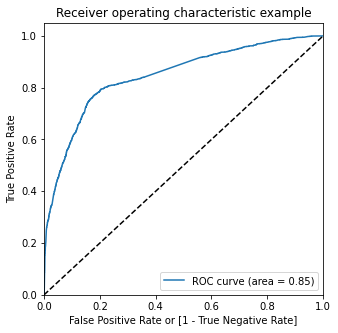

In [103]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score)

## Step 9: Finding the Optimal Cutoff Point
Optimal cutoff probability is where we get balanced sensitivity and specificity

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Score,Prospect_ID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.412020,1871,0,1,1,1,1,1,0,0,0,0,0
6795,0,0.102689,6795,0,1,1,0,0,0,0,0,0,0,0
3516,0,0.249418,3516,0,1,1,1,0,0,0,0,0,0,0
8105,0,0.610339,8105,1,1,1,1,1,1,1,1,0,0,0
3934,0,0.185482,3934,0,1,1,0,0,0,0,0,0,0,0


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.446970  0.990268  0.112194
0.2   0.2  0.737477  0.829278  0.680910
0.3   0.3  0.797774  0.779805  0.808846
0.4   0.4  0.803340  0.730333  0.848326
0.5   0.5  0.790198  0.641119  0.882059
0.6   0.6  0.780612  0.558394  0.917541
0.7   0.7  0.759431  0.449311  0.950525
0.8   0.8  0.730829  0.330089  0.977761
0.9   0.9  0.712894  0.263179  0.990005


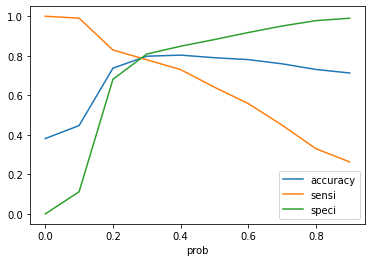

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the curve above, between 0.2 to 0.3 is the optimum point to take it as a cutoff probability.**

In [107]:
# To make sure we have better sensitivity in the model, we'll choose the cutoff to be 0.22

y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score.map( lambda x: 1 if x > 0.22 else 0)

y_train_pred_final.head()

,Converted,Lead_Score,Prospect_ID,Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1871,0,0.412020,1871,0,1,1,1,1,1,0,0,0,0,0,1
6795,0,0.102689,6795,0,1,1,0,0,0,0,0,0,0,0,0
3516,0,0.249418,3516,0,1,1,1,0,0,0,0,0,0,0,1
8105,0,0.610339,8105,1,1,1,1,1,1,1,1,0,0,0,1
3934,0,0.185482,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [108]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7611317254174397

In [109]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2908, 1094],
       [ 451, 2015]], dtype=int64)

In [110]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8171127331711273

In [111]:
# Let us calculate specificity
TN / float(TN+FP)

0.7266366816591704

In [112]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.2733633183408296


In [113]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6481183660340946


In [114]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8657338493599286


In [115]:
# Precision:
TP/float(TP+FP)

0.6481183660340946

In [116]:
#Recall:
TP/float(FN+TP)

0.8171127331711273

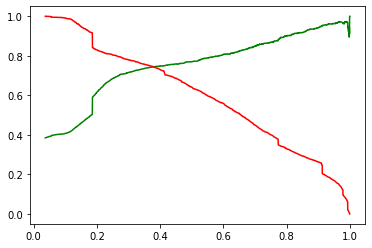

In [117]:
# Precision Recall Curve
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Lead_Score)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [118]:
#Predicted Conversion Rate for the train dataset
converted = y_train_pred_final.final_predicted.sum()/len(y_train_pred_final.index)*100
converted

48.067408781694496

## Step 10: Making Predictions on the Test Set

In [119]:
# Scaling
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,0,0,0.114286,0.214349,0.088667,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3516,0,0,0.142857,0.046655,0.166667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,0,0,0.142857,0.541373,0.333333,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [120]:
X_test = X_test[col5]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,Specialization_Others,What is your current occupation_Working Professional
4269,0,0.228571,0.448735,0,0,0,0,0,1,0
2376,0,0.000000,0.000000,0,1,0,0,0,1,0
7766,0,0.142857,0.026187,0,0,0,0,0,0,1
9199,0,0.000000,0.000000,0,0,1,0,0,1,0
4359,0,0.000000,0.000000,0,1,0,0,0,0,0


In [121]:
X_test_sm = sm.add_constant(X_test)

In [122]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.481592
2376    0.773580
7766    0.850342
9199    0.185482
4359    0.913145
9186    0.327339
1631    0.509887
8963    0.152612
8007    0.205438
5324    0.152275
dtype: float64

In [123]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.481592
2376,0.773580
7766,0.850342
9199,0.185482
4359,0.913145


In [124]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.481592
1,1,2376,0.773580
2,1,7766,0.850342
3,0,9199,0.185482
4,1,4359,0.913145


In [125]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead Score'})

In [126]:
y_pred_final.head()

,Converted,Prospect ID,Lead Score
0,1,4269,0.481592
1,1,2376,0.773580
2,1,7766,0.850342
3,0,9199,0.185482
4,1,4359,0.913145


In [127]:
#Final Prediction
y_pred_final['final_prediction'] = y_pred_final['Lead Score'].map(lambda x: 1 if x > 0.22 else 0)

y_pred_final.head()

,Converted,Prospect ID,Lead Score,final_prediction
0,1,4269,0.481592,1
1,1,2376,0.773580,1
2,1,7766,0.850342,1
3,0,9199,0.185482,0
4,1,4359,0.913145,1


In [128]:
# Covnert the Lead Score to be a 0-100 range
y_pred_final['Lead Score'] = y_pred_final['Lead Score']*100

In [129]:
y_pred_final.head()

,Converted,Prospect ID,Lead Score,final_prediction
0,1,4269,48.159186,1
1,1,2376,77.358041,1
2,1,7766,85.034237,1
3,0,9199,18.548227,0
4,1,4359,91.314512,1


In [130]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_prediction)

0.7518037518037518

In [131]:
#Confusion Matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_prediction)
confusion2

array([[1186,  491],
       [ 197,  898]], dtype=int64)

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8200913242009132

In [133]:
# Let us calculate specificity
TN / float(TN+FP)

0.7072152653548003

In [134]:
#Predicted Conversion Rate for the test dataset
pred_conv_rate = y_pred_final.final_prediction.sum()/len(y_pred_final.index)*100
pred_conv_rate

50.10822510822511

In [135]:
# Percentage increase in the conversion rate using the model as comparied to the historical data. 
((pred_conv_rate-hist_conv_rate)/hist_conv_rate)*100

30.019657399606857

#### The above model will help X Education to identify 30% more leads with a high probability of conversion as compared to their current conversion rate. 